<a href="https://colab.research.google.com/github/jphaugh/Bioinformatics-FinalProject/blob/main/Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Combining all Old World MHC into a database for BLAST

In [ ]:
!cat *.faa > OldWorld_MHC.faa

Testing files in dataset, seems to be working properly

In [ ]:
!head -50 OldWorld_MHC.faa


>XP_072861886.1 LOC140708851 [organism=Chlorocebus sabaeus] [GeneID=140708851]
MDWGVPALGIPHLXEVSLLLTTCVESFFLDTHDANPVLTPIGCRXSRDANQRRRSPGSKVPTHXPGLRFS
ADAEDGVMAPRTLLLVLSGALALTQTRAGSHSMRYFYTSMFRPGRGEPRFIAVGYVDDTQFVRFDSDAMS
PRMEPRAPWVEQEGPEYWDRETQNMKAETQRAPVNLRNLRGYYNQSEAGSHTVQRMVGCDLGPDRRLLRG
YEQYAYDGKDYFALNEDLRSWTAADVAAQNTQRKWEAAGVAERMRAYLEGECLEWLRRHLENGKETLQRA
DPPKTHVTHHPVSDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDRTFQKWAAVVVPSG
EEQRYTCHVQHKGLPKPLTLKWEPSSQSTIPIVGIIAGLVLLGAVVTGAVVAAVMWRRKSSDRKGGSYSQ
AASSDSAQGSDVSLTACKV
>XP_072861940.1 LOC103221783 [organism=Chlorocebus sabaeus] [GeneID=103221783]
MSLNEGLRTWTAAQRAAWRIQRTWERFWTAEATREALMGHSIRWLFRHLEHGKETLLPAGVGSFFQDTRH
ASPVPTLIGCGMSREANQRRRGLSSKVPTRPPGLRVSSDAKMRVMGSRTFLLLLSGALALTQTXAGSHSL
RYFSAGMSRPGRGEPRFISVGYVDDTQFLRFDSDAASPRLEPRAPWLEQEGPEYWEEQTGLAKANAQTFR
VGLRNLRGYYNQSEAGSHTLQWMAGCDPGPDGHLLRWYHQFAYDGKDYNAVNGDLRSXTAADTAAQITQR
KWEAAREAEQWRAHVEGECVKWFRRHLENGKETLQRADPPKTHVTYHPISDHEAILRCWALGFYPAEITL
TWQRDGEEQTQDTELVETRPGGDGTYQKWGAVVVPSGEEQR

Downloading package, making BLAST dataset

In [ ]:
!apt-get install ncbi-blast+ -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  ncbi-data
The following NEW packages will be installed:
  ncbi-blast+ ncbi-data
0 upgraded, 2 newly installed, 0 to remove and 41 not upgraded.
Need to get 15.8 MB of archives.
After this operation, 71.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 ncbi-data all 6.1.20170106+dfsg1-9 [3,519 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 ncbi-blast+ amd64 2.12.0+ds-3build1 [12.3 MB]
Fetched 15.8 MB in 1s (11.9 MB/s)
Selecting previously unselected package ncbi-data.
(Reading database ... 121229 files and directories currently installed.)
Preparing to unpack .../ncbi-data_6.1.20170106+dfsg1-9_all.deb ...
Unpacking ncbi-data (6.1.20170106+dfsg1-9) ...
Selecting previously unselected package ncbi-blast+.
Preparing to unpack .../ncbi-blast+_2.12.0+ds-3build1_amd64.deb .

Code seems to have worked. Provided 7 files in Colab that form the BLAST database. Uploaded these into Bridges2 directory

In [ ]:
!makeblastdb -in OldWorld_MHC.faa -dbtype prot -out OldWorld_MHC_DB -title "OldWorld_Primate_MHC"



Building a new DB, current time: 11/11/2025 16:43:49
New DB name:   /content/OldWorld_MHC_DB
New DB title:  OldWorld_Primate_MHC
Sequence type: Protein
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 99 sequences in 0.00380206 seconds.




BLAST was not working; the Marmoset genome is in nucleotides while the databases were based on proteins, which is an issue. Redownloaded the Marmoset protein sequences to try again

Redownloaded Marmoset protein file to retry. Query is protein file, DB is the MHC database files made from the protein sequence database made previously. Seemed to work properly after running in Bridges2:

In [ ]:
# Make sure output directory exists
mkdir -p blastp_results

# Run BLASTP
blastp -query ./Marmosetprotein/ncbi_dataset/data/GCF_011100555.1/protein.faa \
       -db OldWorld_MHC_DB \
       -out blastp_results/Marmoset_vs_OldWorldMHC.tsv \
       -outfmt "6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore" \
       -evalue 1e-5 \
       -max_target_seqs 10 \
       -num_threads 8


Ran this code in Bridges2 to get the comparisons in a tsv file, labeled "Marmoset_vs_OldWorldMHC.tsv":

In [ ]:
[jhaugh@bridges2-login014 FinalProject]$ blastp -query ./Marmosetprotein/ncbi_dataset/data/GCF_011100555.1/protein.faa \
>        -db OldWorld_MHC_DB \
>        -out blastp_results/Marmoset_vs_OldWorldMHC.tsv \
>        -outfmt "6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore" \
>        -evalue 1e-5 \
>        -max_target_seqs 10 \
>        -num_threads 8

The code below (Bridges2) filters the hits to keep only rows where e-value ≤ 1e-5 → statistically significant match AND percent identity ≥ 70% → reasonably similar sequences. New filtered file is "Marmoset_vs_OldWorldMHC_filtered.tsv" and uploaded into Colab for analyses and visualization:

In [ ]:
awk '$11 <= 1e-5 && $3 >= 70' blastp_results/Marmoset_vs_OldWorldMHC.tsv \
    > blastp_results/Marmoset_vs_OldWorldMHC_filtered.tsv
[jhaugh@bridges2-login014 FinalProject]$ awk '$11 <= 1e-5 && $3 >= 70' blastp_results/Marmoset_vs_OldWorldMHC.tsv \
>     > blastp_results/Marmoset_vs_OldWorldMHC_filtered.tsv

Running this code here in Colab to test and see stuff form the output file, Marmoset_vs_OldWorldMHC_filtered.tsv

In [ ]:
# ==========================
# Step 1 — Import packages
# ==========================
import pandas as pd

# ==========================
# Step 2 — Load the BLASTP filtered file
# ==========================
file_path = "/content/Marmoset_vs_OldWorldMHC_filtered.tsv"  # Update if different
columns = ["qseqid", "sseqid", "pident", "length", "mismatch", "gapopen",
           "qstart", "qend", "sstart", "send", "evalue", "bitscore"]

try:
    blast_df = pd.read_csv(file_path, sep="\t", names=columns)
    print("File loaded successfully!")
except Exception as e:
    print(f"Error loading file: {e}")

# ==========================
# Step 3 — Quick overview
# ==========================
# Show the first 10 rows
print("\nFirst 10 hits:")
display(blast_df.head(10))

# Basic statistics
print("\nSummary statistics for % identity and alignment length:")
display(blast_df[["pident", "length"]].describe())

# ==========================
# Step 4 — Count hits per Old World MHC gene
# ==========================
hit_counts = blast_df["sseqid"].value_counts()
print("\nNumber of hits per Old World MHC gene:")
display(hit_counts)

# ==========================
# Step 5 — Optional: top 10 best hits by bitscore
# ==========================
top_hits = blast_df.sort_values("bitscore", ascending=False).head(10)
print("\nTop 10 hits by bitscore:")
display(top_hits)


File loaded successfully!

First 10 hits:


,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,NP_001254681.2,ref|XP_028703519.1|,87.451,255,32,0,1,255,17,271,1.300000e-163,447.0
1,NP_001254681.2,ref|XP_028702449.1|,86.275,255,35,0,1,255,1,255,2.350000e-158,433.0
2,NP_001254681.2,ref|NP_001037726.2|,86.275,255,35,0,1,255,1,255,2.350000e-158,433.0
3,NP_001254681.2,ref|NP_001035119.2|,85.098,255,38,0,1,255,1,255,3.370000e-157,431.0
4,NP_001254681.2,ref|NP_001305109.1|,84.706,255,39,0,1,255,1,255,1.090000e-156,429.0
5,NP_001254681.2,ref|XP_028703744.1|,91.667,132,11,0,124,255,5,136,3.420000e-78,227.0
6,NP_001288777.1,ref|XP_041536701.1|,78.453,362,78,0,1,362,1,362,0.000000e+00,585.0
7,NP_001288777.1,ref|XP_041536702.1|,78.393,361,78,0,1,361,1,361,0.000000e+00,581.0
8,NP_001288777.1,ref|NP_002107.3|,80.663,362,70,0,1,362,4,365,0.000000e+00,581.0
9,NP_001288777.1,ref|NP_001041711.2|,80.387,362,71,0,1,362,4,365,0.000000e+00,576.0



Summary statistics for % identity and alignment length:


,pident,length
count,438.000000,438.000000
mean,78.714237,309.009132
std,4.065704,79.099248
min,70.082000,48.000000
25%,75.967750,266.000000
50%,78.108000,345.000000
75%,81.586000,362.000000
max,93.182000,402.000000



Number of hits per Old World MHC gene:


,count
sseqid,
ref|XP_041536701.1|,34
ref|NP_002107.3|,32
ref|NP_001229687.1|,32
ref|XP_041536702.1|,31
ref|NP_001041711.2|,27
...,...
ref|XP_028703566.1|,1
ref|XP_028703565.1|,1
ref|XP_028698453.1|,1



Top 10 hits by bitscore:


,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
97,XP_035153306.2,ref|XP_041536702.1|,82.143,392,69,1,7,398,1,391,0.0,656.0
98,XP_035153306.2,ref|XP_028702742.1|,82.828,396,65,2,4,398,1,394,0.0,639.0
107,XP_035153308.2,ref|XP_041536701.1|,83.978,362,58,0,7,368,1,362,0.0,628.0
108,XP_035153308.2,ref|XP_041536702.1|,83.934,361,58,0,7,367,1,361,0.0,626.0
75,XP_035146397.2,ref|XP_041536701.1|,82.597,362,62,1,94,454,1,362,0.0,625.0
99,XP_035153306.2,ref|XP_028702737.1|,82.278,395,67,2,4,398,1,392,0.0,625.0
100,XP_035153306.2,ref|XP_041536701.1|,83.934,361,58,0,7,367,1,361,0.0,624.0
35,XP_035146130.2,ref|NP_002107.3|,84.384,365,56,1,1,364,1,365,0.0,624.0
76,XP_035146397.2,ref|XP_041536702.1|,82.548,361,62,1,94,453,1,361,0.0,622.0
77,XP_035146397.2,ref|NP_002107.3|,83.562,365,59,1,91,454,1,365,0.0,619.0


This next code shows:

**Barplot of hits per gene:** which Old World MHC subfamilies have the most Marmoset matches.


**Histogram of % identity:** Visualizes how conserved the matches are.


**Top hits by bitscore:** Highlights the strongest Marmoset–Old World matches.

/tmp/ipython-input-1433632303.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hit_counts.index, y=hit_counts.values, palette="viridis")


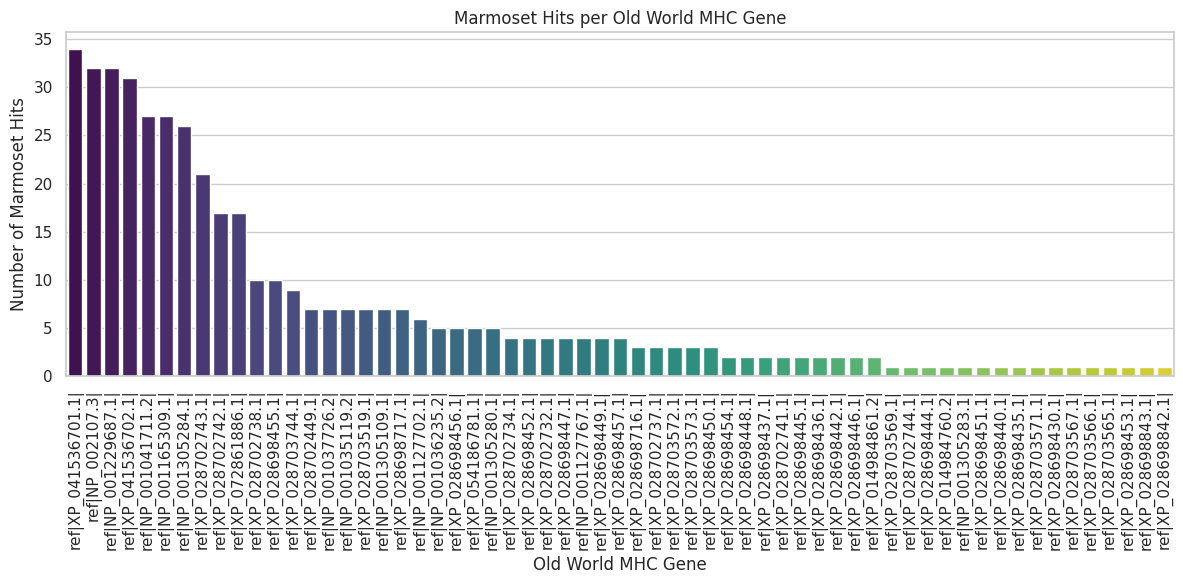

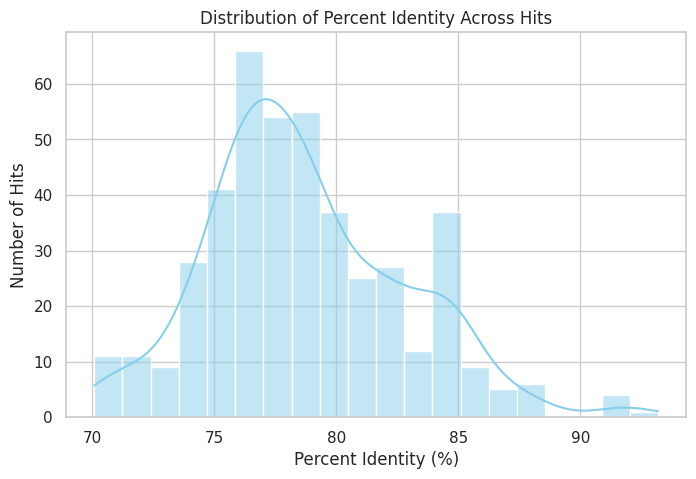

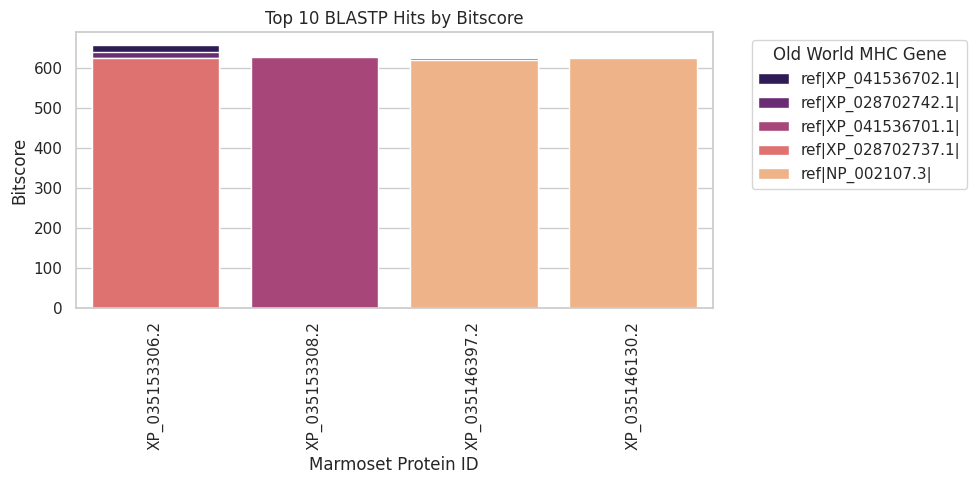

In [ ]:
# ==========================
# Step 0 — Import packages
# ==========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ==========================
# Step 1 — Load BLASTP filtered file
# ==========================
file_path = "/content/Marmoset_vs_OldWorldMHC_filtered.tsv"
columns = ["qseqid", "sseqid", "pident", "length", "mismatch", "gapopen",
           "qstart", "qend", "sstart", "send", "evalue", "bitscore"]

blast_df = pd.read_csv(file_path, sep="\t", names=columns)

# ==========================
# Step 2 — Count hits per Old World MHC gene
# ==========================
hit_counts = blast_df["sseqid"].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=hit_counts.index, y=hit_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Number of Marmoset Hits")
plt.xlabel("Old World MHC Gene")
plt.title("Marmoset Hits per Old World MHC Gene")
plt.tight_layout()
plt.show()

# ==========================
# Step 3 — Distribution of percent identity
# ==========================
plt.figure(figsize=(8,5))
sns.histplot(blast_df["pident"], bins=20, kde=True, color="skyblue")
plt.xlabel("Percent Identity (%)")
plt.ylabel("Number of Hits")
plt.title("Distribution of Percent Identity Across Hits")
plt.show()

# ==========================
# Step 4 — Top 10 hits by bitscore
# ==========================
top_hits = blast_df.sort_values("bitscore", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_hits["qseqid"], y=top_hits["bitscore"], hue=top_hits["sseqid"], dodge=False, palette="magma")
plt.xticks(rotation=90)
plt.ylabel("Bitscore")
plt.xlabel("Marmoset Protein ID")
plt.title("Top 10 BLASTP Hits by Bitscore")
plt.legend(title="Old World MHC Gene", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


Another test, top hits as a heatmap:

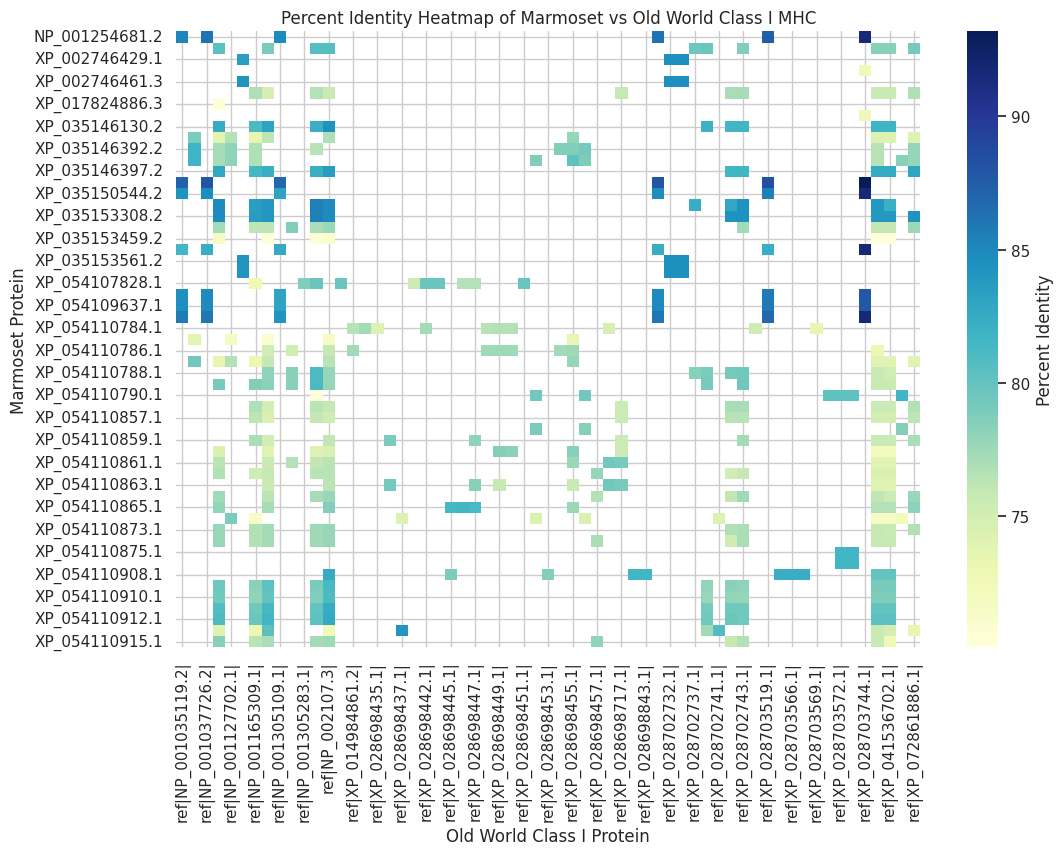

In [ ]:
heatmap_data = blast_df.groupby(["qseqid", "sseqid"])["pident"].mean().unstack()

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Percent Identity'})
plt.xlabel("Old World Class I Protein")
plt.ylabel("Marmoset Protein")
plt.title("Percent Identity Heatmap of Marmoset vs Old World Class I MHC")
plt.show()

Top hits table:

In [ ]:
import pandas as pd

# Load the filtered BLASTP results
columns = ["qseqid", "sseqid", "pident", "length", "mismatch", "gapopen",
           "qstart", "qend", "sstart", "send", "evalue", "bitscore"]
blast_df = pd.read_csv("/content/Marmoset_vs_OldWorldMHC_filtered.tsv",
                       sep="\t", names=columns)

# Sort by bitscore to get the best hits first
top_hits = blast_df.sort_values("bitscore", ascending=False)

# Keep only key columns
top_hits = top_hits[["qseqid", "sseqid", "pident", "bitscore", "evalue"]]

# Print top hits (simple list)
print(top_hits)


             qseqid               sseqid  pident  bitscore        evalue
97   XP_035153306.2  ref|XP_041536702.1|  82.143     656.0  0.000000e+00
98   XP_035153306.2  ref|XP_028702742.1|  82.828     639.0  0.000000e+00
107  XP_035153308.2  ref|XP_041536701.1|  83.978     628.0  0.000000e+00
108  XP_035153308.2  ref|XP_041536702.1|  83.934     626.0  0.000000e+00
75   XP_035146397.2  ref|XP_041536701.1|  82.597     625.0  0.000000e+00
..              ...                  ...     ...       ...           ...
362  XP_054110876.1  ref|XP_028703572.1|  81.609     148.0  1.600000e-46
360  XP_054110875.1  ref|XP_028703572.1|  81.609     148.0  1.600000e-46
361  XP_054110876.1  ref|XP_028703573.1|  81.609     148.0  1.390000e-46
359  XP_054110875.1  ref|XP_028703573.1|  81.609     148.0  1.390000e-46
151  XP_054107828.1  ref|NP_001165309.1|  70.833      40.8  6.780000e-07

[438 rows x 5 columns]


Sort by % identity:

In [ ]:
import pandas as pd

# Load the filtered BLASTP results
columns = ["qseqid", "sseqid", "pident", "length", "mismatch", "gapopen",
           "qstart", "qend", "sstart", "send", "evalue", "bitscore"]
blast_df = pd.read_csv("/content/Marmoset_vs_OldWorldMHC_filtered.tsv",
                       sep="\t", names=columns)

# Sort by percent identity to get the highest similarity first
top_identity_hits = blast_df.sort_values("pident", ascending=False)

# Keep only key columns
top_identity_hits = top_identity_hits[["qseqid", "sseqid", "pident", "bitscore", "evalue"]]

# Print top hits (simple list)
print(top_identity_hits)


             qseqid               sseqid  pident  bitscore         evalue
90   XP_035150542.2  ref|XP_028703744.1|  93.182     230.0   1.930000e-79
138  XP_035153486.2  ref|XP_028703744.1|  91.667     227.0   2.750000e-78
173  XP_054109638.1  ref|XP_028703744.1|  91.667     226.0   5.170000e-78
5    NP_001254681.2  ref|XP_028703744.1|  91.667     227.0   3.420000e-78
96   XP_035150544.2  ref|XP_028703744.1|  91.667     227.0   2.050000e-78
..              ...                  ...     ...       ...            ...
131  XP_035153459.2  ref|NP_001229687.1|  70.360     490.0  5.800000e-178
425  XP_054110914.1  ref|XP_028702738.1|  70.175     162.0   2.120000e-50
128  XP_035153459.2  ref|XP_041536702.1|  70.083     509.0   0.000000e+00
127  XP_035153459.2  ref|XP_041536701.1|  70.083     511.0   0.000000e+00
230  XP_054110790.1  ref|NP_001305284.1|  70.082     338.0  4.960000e-120

[438 rows x 5 columns]


Top hit from marmoset is a class II protein--we may have inadvertendly included some from the macaque...
But makes sense that the top hits by % are from class II proteins since those are supposed to be ancestral.